##### Task 1.1. Write a function to check if an email adress is correct (use re python module)

In [12]:
import re

email = "dmytro19022006@gmail.com"

def is_valid_email(email):
    """
      Args:
        email: string to check

      Returns:
        True, if row is a correct email, or False.
    """
    # write a correct regular expression to check emails
    pattern = r'^[a-zA-Z0-9_.+-]+@gmail\.com$'

    if re.fullmatch(pattern, email):
        return True
    else:
        return False

print(is_valid_email(email))


True


##### Task 1.2. Write a function which removes all the numbers from the text (use re python module)

In [13]:
def remove_numbers(text):
    """
      Args:
        text: input text

      Returns:
        Text without numbers
    """
    # write a correct regular expression to remove numbers
    pattern = r'\d'
    text_wd = re.sub(pattern, '', text)

    return text_wd # use a correct function from `re` module

text ="turbo666killer777megadestroyer6000"
print(remove_numbers(text))

turbokillermegadestroyer


In [14]:
import pandas as pd
import matplotlib.pyplot as plt # you can use seaborn or any other visualization tool 


df = pd.read_csv('D:/PY.Libs/lab4/tweet_emotions.csv') # change path to file if you need
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


##### Task 2.1. Calculate the amount of records for each sentiment. Build a chart which displays the result.

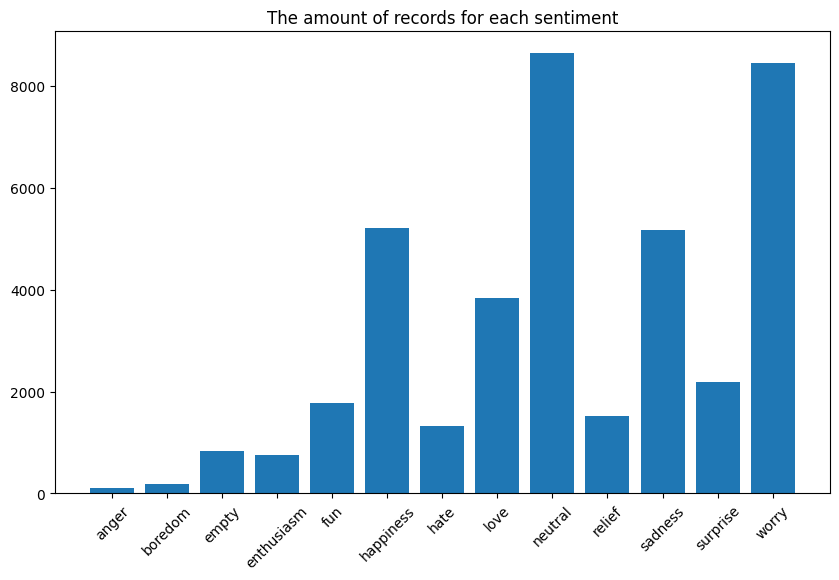

In [15]:
sentiment_counts = df.groupby('sentiment')['content'].count().reset_index(name='Num of sentiments')
sentiment_counts
# visualize result as a barchart
plt.figure(figsize=(10, 6))

plt.bar(sentiment_counts['sentiment'], sentiment_counts['Num of sentiments'])
plt.title('The amount of records for each sentiment')
plt.xticks(rotation=45)

plt.show()

##### Task 2.2. Calculate an average length of records for each sentiment. Build a chart which displays the result.

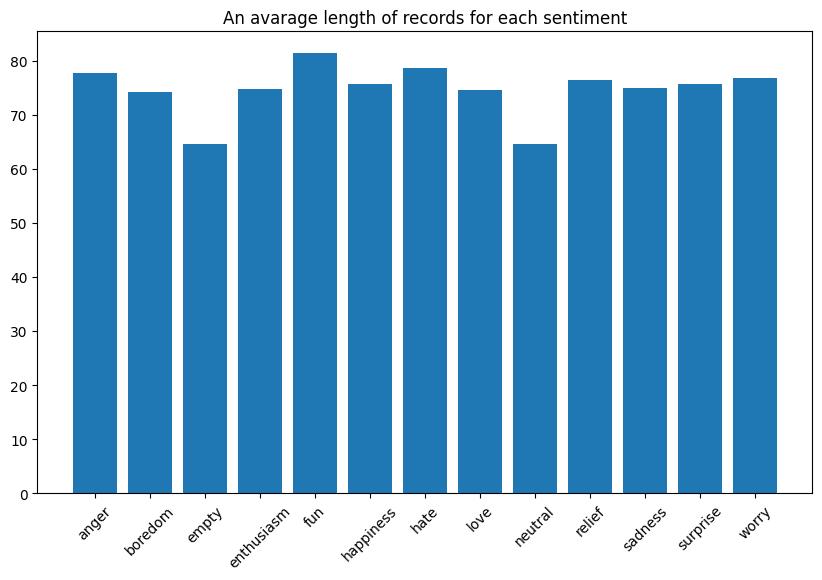

In [16]:
df['text_length'] = df['content'].apply(len)
# calculate mean text length for each sentiment
mean_length_by_sentiment = df.groupby('sentiment')['text_length'].mean().reset_index(name='mean text length')
mean_length_by_sentiment
# visualize result as a barchart
plt.figure(figsize=(10, 6))

plt.bar(mean_length_by_sentiment['sentiment'], mean_length_by_sentiment['mean text length'])
plt.title('An avarage length of records for each sentiment')
plt.xticks(rotation=45)

plt.show()


##### Task 2.3. Compare average words count in each record for each category. Build a chart which displays the result.

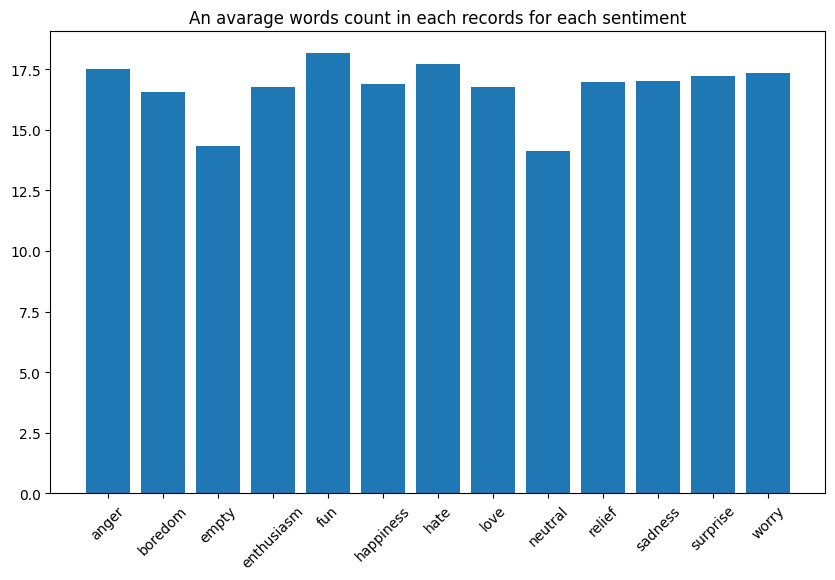

In [18]:
import nltk
from nltk.tokenize import word_tokenize

def count_words(text):
    words = word_tokenize(text)
    return len(words) # return the amount of rows

# apply your function to each record
df['word_count'] = df['content'].apply(count_words)

# calculate average amount of words for each sentiment
mean_word_count_by_sentiment = df.groupby('sentiment')['word_count'].mean().reset_index(name='mean word count')

# visualize result as a barchart
plt.figure(figsize=(10, 6))

plt.bar(mean_word_count_by_sentiment['sentiment'], mean_word_count_by_sentiment['mean word count'])
plt.title('An avarage words count in each records for each sentiment')
plt.xticks(rotation=45)

plt.show()


##### Task 2.4 (optional) You can build any other visualization to display additional findings about source dataset

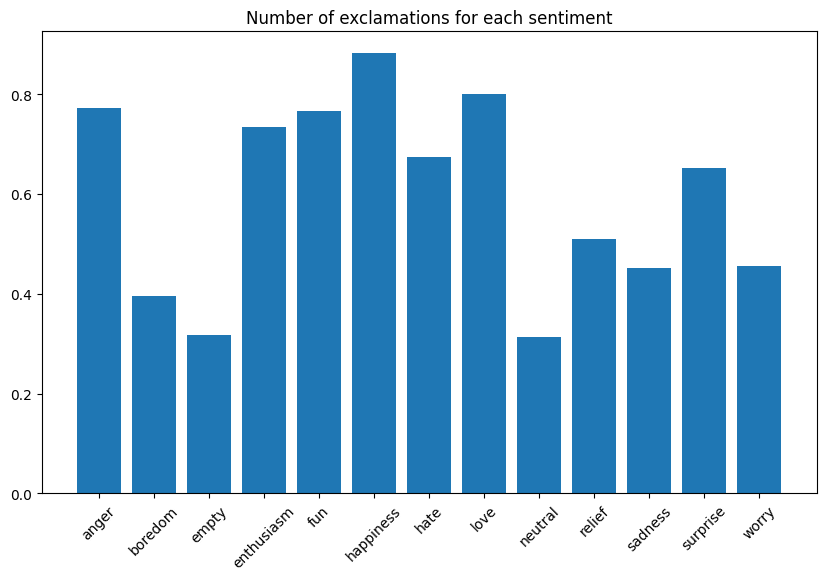

In [19]:
def count_exclamations(text):
    return text.count("!")

df['exclamation count'] = df['content'].apply(count_exclamations)

excl_by_sent = df.groupby('sentiment')['exclamation count'].mean().reset_index(name="Num of exclamations")
excl_by_sent

plt.figure(figsize=(10, 6))

plt.bar(excl_by_sent['sentiment'],excl_by_sent['Num of exclamations'])

plt.title('Number of exclamations for each sentiment')
plt.xticks(rotation=45)
plt.show()

##### Task 3. Your main task is to do a text processing on the provided dataset similar to what we did on the lecture (text cleaning, tokenization, lemmatezation, stop-words removing, stemming)


1) check if there is any emty rows
2) check if dataset is balanced or not
3) calculate content polarity using TextBlob module
4) build a histogram which shows distribution of polarity for sentiment `worry`
5) build a histogram which shows distribution of polarity for sentiment `happiness`
6) remove punctuation
7) remove stopwords 
8) remove numbers
9) you can add any other analysis which looks interesting for you or build additional visualizations (like WordCloude)

In [20]:
# 1
df.drop(['text_length'], axis=1, inplace=True)
my_df = df.copy()
df[df.isna().any(axis=1)]
df

,tweet_id,sentiment,content,word_count,exclamation count
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,20,0
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,13,0
2,1956967696,sadness,Funeral ceremony...gloomy friday...,6,0
3,1956967789,enthusiasm,wants to hang out with friends SOON!,8,1
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,18,0
...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,2,0
39996,1753919001,love,Happy Mothers Day All my love,6,0
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,30,1
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,28,7


In [31]:
#2
sent_counts = df['sentiment'].value_counts()
is_balanced = (sent_counts.min() > 0) and ((sent_counts.max() / sent_counts.min()) < 2)
is_balanced

False

,tweet_id,sentiment,content,word_count,exclamation count,polarity
0,1956967341,empty,tiffanylue know listenin bad habit earlier sta...,20,0,-0.350000
1,1956967666,sadness,Layin n bed headache ughhhhwaitin call,13,0,0.000000
2,1956967696,sadness,Funeral ceremonygloomy friday,6,0,0.000000
3,1956967789,enthusiasm,wants hang friends SOON,8,1,0.200000
4,1956968416,neutral,dannycastillo want trade someone Houston ticke...,18,0,0.000000
...,...,...,...,...,...,...
39995,1753918954,neutral,JohnLloydTaylor,2,0,0.000000
39996,1753919001,love,Happy Mothers Day love,6,0,0.650000
39997,1753919005,love,Happy Mothers Day mommies woman man long youre...,30,1,0.375000
39998,1753919043,happiness,niariley WASSUP BEAUTIFUL FOLLOW PEEP NEW HIT ...,28,7,0.493182


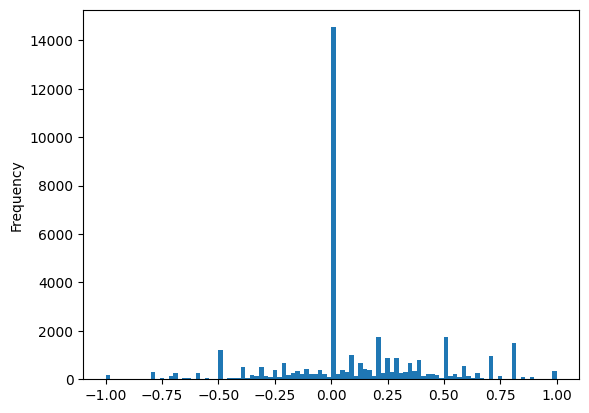

In [33]:
# 3
from textblob import TextBlob

df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['polarity'].plot(kind='hist', bins=100)
df

<Axes: ylabel='Frequency'>

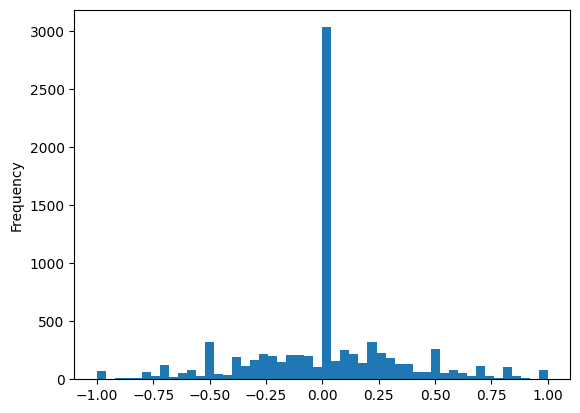

In [23]:
# 4
sent_worry = df[df['sentiment'] == 'worry']
sent_worry['polarity'].plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

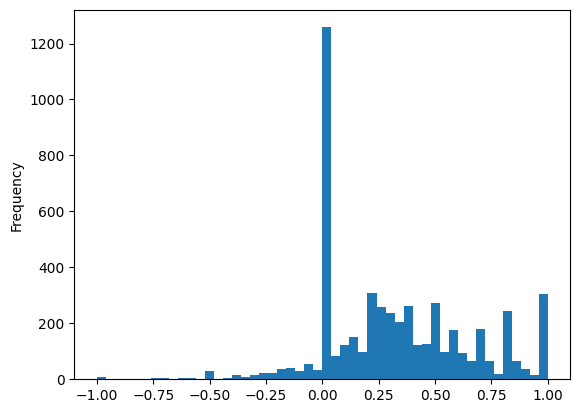

In [24]:
# 5
sent_happ = df[df['sentiment'] == 'happiness']
sent_happ['polarity'].plot(kind='hist', bins=50)

In [25]:
# 6
import string

def remove_punct(text):
    clean_list = []
    for ch in text:
        if ch not in string.punctuation:
            clean_list.append(ch)
    return ''.join(clean_list)

df['content'] = df['content'].apply(remove_punct)
df

,tweet_id,sentiment,content,word_count,exclamation count,polarity
0,1956967341,empty,tiffanylue i know i was listenin to bad habit...,20,0,-0.350000
1,1956967666,sadness,Layin n bed with a headache ughhhhwaitin on y...,13,0,0.000000
2,1956967696,sadness,Funeral ceremonygloomy friday,6,0,0.000000
3,1956967789,enthusiasm,wants to hang out with friends SOON,8,1,0.250000
4,1956968416,neutral,dannycastillo We want to trade with someone wh...,18,0,0.000000
...,...,...,...,...,...,...
39995,1753918954,neutral,JohnLloydTaylor,2,0,0.000000
39996,1753919001,love,Happy Mothers Day All my love,6,0,0.650000
39997,1753919005,love,Happy Mothers Day to all the mommies out there...,30,1,0.368750
39998,1753919043,happiness,niariley WASSUP BEAUTIFUL FOLLOW ME PEEP OUT ...,28,7,0.606534


In [34]:
# 7
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

stopW = stopwords.words('english')
print(stopW)

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_sentence = [word for word in words if word.lower() not in stopW]
    return ' '.join(filtered_sentence)

df['content'] = df['content'].apply(remove_stopwords)
df


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,tweet_id,sentiment,content,word_count,exclamation count,polarity
0,1956967341,empty,tiffanylue know listenin bad habit earlier sta...,20,0,-0.350000
1,1956967666,sadness,Layin n bed headache ughhhhwaitin call,13,0,0.000000
2,1956967696,sadness,Funeral ceremonygloomy friday,6,0,0.000000
3,1956967789,enthusiasm,wants hang friends SOON,8,1,0.200000
4,1956968416,neutral,dannycastillo want trade someone Houston ticke...,18,0,0.000000
...,...,...,...,...,...,...
39995,1753918954,neutral,JohnLloydTaylor,2,0,0.000000
39996,1753919001,love,Happy Mothers Day love,6,0,0.650000
39997,1753919005,love,Happy Mothers Day mommies woman man long youre...,30,1,0.375000
39998,1753919043,happiness,niariley WASSUP BEAUTIFUL FOLLOW PEEP NEW HIT ...,28,7,0.493182


In [27]:
# 8
def remove_num(text):
    clean_list = []
    for i in text:
        if not re.search(r'\d', i):
            clean_list.append(i)
    return ''.join(clean_list)

df['content'] = df['content'].apply(remove_num)
df

,tweet_id,sentiment,content,word_count,exclamation count,polarity
0,1956967341,empty,tiffanylue know listenin bad habit earlier sta...,20,0,-0.350000
1,1956967666,sadness,Layin n bed headache ughhhhwaitin call,13,0,0.000000
2,1956967696,sadness,Funeral ceremonygloomy friday,6,0,0.000000
3,1956967789,enthusiasm,wants hang friends SOON,8,1,0.250000
4,1956968416,neutral,dannycastillo want trade someone Houston ticke...,18,0,0.000000
...,...,...,...,...,...,...
39995,1753918954,neutral,JohnLloydTaylor,2,0,0.000000
39996,1753919001,love,Happy Mothers Day love,6,0,0.650000
39997,1753919005,love,Happy Mothers Day mommies woman man long youre...,30,1,0.368750
39998,1753919043,happiness,niariley WASSUP BEAUTIFUL FOLLOW PEEP NEW HIT ...,28,7,0.606534


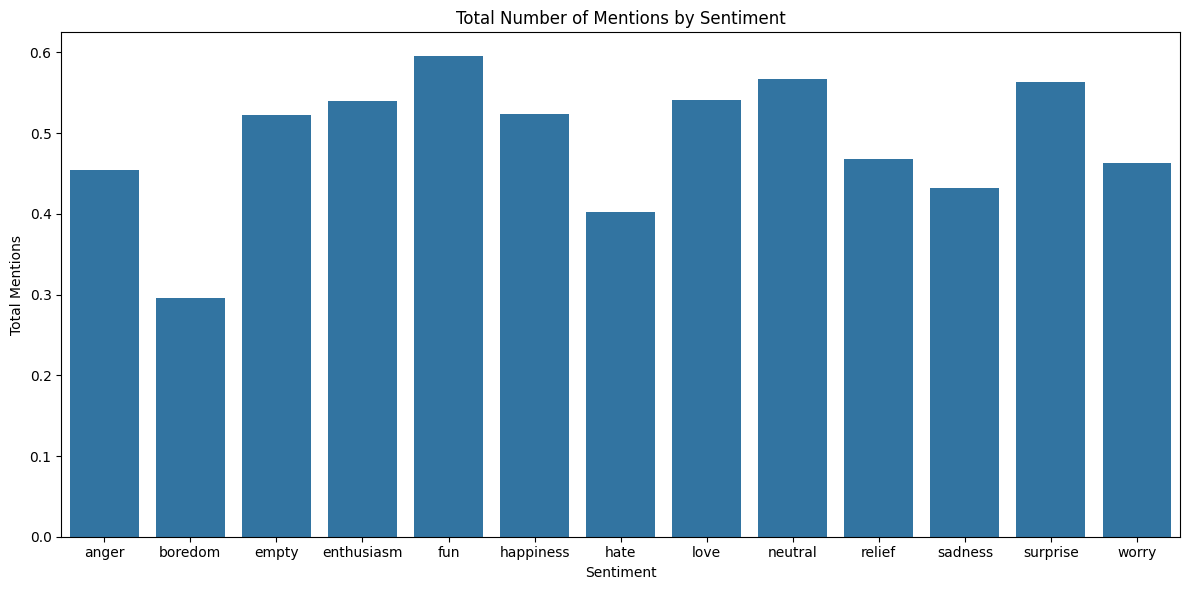

In [35]:
# 9
import seaborn as sns
# It's interesting, how the frequency of user mentions affects on the tweet sentiment??

def freq_ment(text):
    return text.count('@')

my_df['user mentions'] = my_df['content'].apply(freq_ment)
freq_ment_df = my_df.groupby('sentiment')['user mentions'].mean().reset_index(name='num of mentions')

# Побудова стовпчастого графіка для кількості згадок за настроєм
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment', y='num of mentions', data=freq_ment_df)
plt.title('Total Number of Mentions by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Total Mentions')

plt.tight_layout()
plt.show()

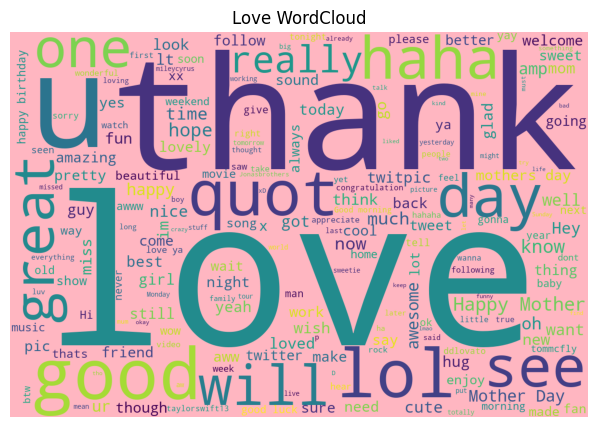

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

freq_love_ment_df = my_df[(my_df['sentiment'] == 'love') & (my_df['user mentions'] > 0)]

love_text = ' '.join(freq_love_ment_df['content'])
wordcloud = WordCloud(width=1200, height=800, background_color='lightpink').generate(love_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  
plt.title('Love WordCloud')
plt.show()